In [ ]:
!pip install git+https://github.com/openai/CLIP.git --no-deps
!pip install ftfy 
!pip install torch-dreams 

In [192]:
import clip
import matplotlib.pyplot as plt
from torch_dreams.dreamer import dreamer
import torchvision.transforms as transforms


model, preprocess = clip.load("RN50", device= 'cuda', jit = False)
dreamy_boi = dreamer(model, device = 'cuda')

In [145]:
## borderline illegal way to overrride the forward function lol
model.forward = model.encode_image  

In [237]:
def probably_buddhism(layer_outputs):
    '''
    https://microscope.openai.com/models/contrastive_rn50/image_block_4_2_Add_6_0/13
    '''
    loss = layer_outputs[0][13].mean()
    return -loss

In [ ]:
model.visual.layer4

In [ ]:

my_transforms = transforms.Compose([
    transforms.RandomAffine(degrees = 2, translate = (0.1,0.1)),
    transforms.Resize(224)
])

dreamy_boi.set_custom_transforms(transforms = my_transforms)

image_param = dreamy_boi.render(
    layers = [model.visual.layer4],
    custom_func = probably_buddhism,
    iters = 300,
)

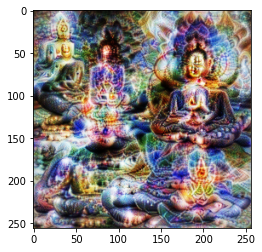

In [245]:
plt.imshow(image_param)